# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind, ttest_1samp, norm, percentileofscore
from numpy.random import seed, sample
%matplotlib inline

medical = pd.read_csv('data/insurance2.csv')

In [187]:
medical.shape

(1338, 8)

In [188]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

The charges are clearly not normally distributed, and show more of a decaying exponential behavior.


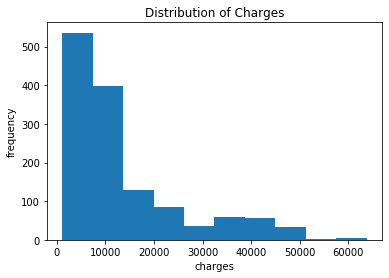

In [189]:
_ = plt.hist(medical.charges)
_ = plt.xlabel('charges')
_ = plt.ylabel('frequency')
_ = plt.title('Distribution of Charges')
print('The charges are clearly not normally distributed, and show more of a decaying exponential behavior.' )

In [190]:
charges_mean = round(medical.charges.mean(),2)
charges_std = round(medical.charges.std(),2)
print('The mean is $'+str(charges_mean)+' and standard deviation is $'+str(charges_std))
print('For the exponential distribution, the mean and standard deviation are equal.')
print('\nThese statistics are not quite appropriate, as the exponential distribution arises from Poisson processes.')
print('For instance, it is not possible to look more than one standard deviation to the left of the mean, as going further \
      \nwould lead into negative numbers.')

The mean is $13270.42 and standard deviation is $12110.01
For the exponential distribution, the mean and standard deviation are equal.

These statistics are not quite appropriate, as the exponential distribution arises from Poisson processes.
For instance, it is not possible to look more than one standard deviation to the left of the mean, as going further       
would lead into negative numbers.


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [191]:
t_stat,p_val = ttest_1samp(medical.charges,popmean=12000)
mode = float(round(medical.charges.mode(),2))
print('t-statistic:',round(t_stat,4),' p-value:',round(p_val,4),' mode:',mode)



t-statistic: 3.8374  p-value: 0.0001  mode: 1639.56


In [192]:
ptile_threshold = round(percentileofscore(medical.charges,12000),2)
ptile_mean = round(percentileofscore(medical.charges,charges_mean),2)
print('\nThreshold percentile:',ptile_threshold,' Sample mean percentile:',ptile_mean)
print('\nThe threshold is part of the 68.6% of charges that are below the sample mean. Another good indication.')


Threshold percentile: 63.23  Sample mean percentile: 68.61

The threshold is part of the 68.6% of charges that are below the sample mean. Another good indication.


In [193]:
lsum=0
usum=0
for k,v in enumerate(medical.charges):
    if v < 12000:
        lsum += v
    else:
        usum += v

under = len(medical.query('charges < 12000')['charges'])
upper = len(medical.query('charges >= 12000')['charges'])

print('\nCharges under $12,000:',under,' Charges $12,000 or more:',upper)

print('\nTotal under $12,000: $',round(lsum,2),' Total above $12,000: $',round(usum,2))
        
print('\nThe raio between income from above and below '\
      'the threshold is', round(usum/lsum,3),'. So almost 2.5 times more revenue is coming in from\n'\
     'the higher charges, even though there are less of them. This is why the average is above' \
      ' $12,000 even though the majority of \ncharges are for less than $12,000.\n')


Charges under $12,000: 846  Charges $12,000 or more: 492

Total under $12,000: $ 5190727.55  Total above $12,000: $ 12565097.44

The raio between income from above and below the threshold is 2.421 . So almost 2.5 times more revenue is coming in from
the higher charges, even though there are less of them. This is why the average is above $12,000 even though the majority of 
charges are for less than $12,000.



__A:__

To justify that these data are sufficient to use in answering the administrator's question, we can perform a t test and get the t-statistic and p-value. These will allow us to accept or reject the null hypothesis. Here, the null hypothesis is that the population mean is at $12,000 or below. 

The p-value of near zero is a strong statistical indication that we must reject the null hypothesis and accept the alternative hypothesis that the population mean is above $12,000.

The Central Limit Theorem also gives justification to the data, because we can sample the sample many times and get a distribution of means from the samples. This distribution of means will approach closer to the normal distribution as the sample size gets larger and larger. Using what we know about normal distributions, we can find a confidence interval for the mean. 

In [194]:
pop_std = round(medical.charges.std(ddof=1),2)
mean_std = round(pop_std/np.sqrt(len(medical.charges)),2)
print('\nPopulation standard deviation: $',pop_std,'  Standard deviation of the mean: $',mean_std)
diff = charges_mean-mean_std
print('\nSince the mean charge is: $',charges_mean,', then one standard deviation lower is $', diff,'. This is well above the\
     \n$12,000 threshold of concern.')


Population standard deviation: $ 12110.01   Standard deviation of the mean: $ 331.07

Since the mean charge is: $ 13270.42 , then one standard deviation lower is $ 12939.35 . This is well above the     
$12,000 threshold of concern.


__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

The confidence interval will be one sided because we are only interested in looking at charges that drop below $12,000. Any measure of confidence of 95\% or greater should be sufficient to ensure that the interpretation is accurate. 

In [195]:
crit = t.ppf(.05,df=len(medical.charges))

norm_std = charges_std/np.sqrt(len(medical.charges))
step = norm_std*crit
low = round(charges_mean + step,2)
print('\nThe low end of the 95% confidence interval range is: $',low)
print('\nThis is well above the threshold of concern.')


The low end of the 95% confidence interval range is: $ 12725.49

This is well above the threshold of concern.


Both the p-value and the confidence interval should assuage the director's concerns. Both show that it is highly unlikely that the mean of the population has fallen below $12,000, and the hospital's business model is safe.

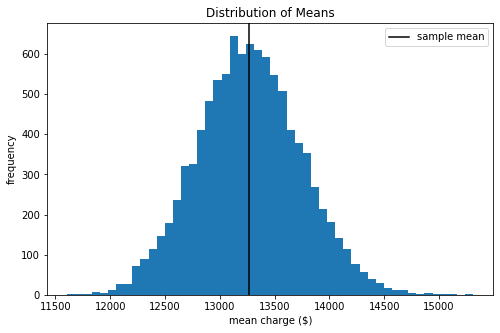

In [196]:
#First we sample the sample many times and take the mean of each to get a spectrum of means Then we plot a histogram:
sample_list = [[np.random.choice(medical.charges,650)] for i in range(10000)]
test_mean_lst = [np.mean(lst) for lst in sample_list]
_=plt.figure(figsize=(8,5))
_=plt.hist(test_mean_lst, bins=50)
_=plt.axvline(charges_mean,c='black')
_=plt.title('Distribution of Means')
_=plt.xlabel('mean charge ($)')
_=plt.ylabel('frequency')
_=plt.legend(['sample mean'])


The histogram shows a distribution that is normal in shape; this is predicted by the Central Limit Theorem. The sample mean is plotted as the vertical black line. We can see that the threshold of concern is on the far left of the distribution. First we will determine some summary statistics, then we will find the 95% confidence interval to ensure that the \$12,000 threshold of concern lies outside of this interval. 

In [197]:
test_mean = round(np.mean(test_mean_lst),3)
test_std = round(np.std(test_mean_lst,ddof=1),3)
print('\nThe mean of means is: $',test_mean,' and the standard deviation of the means is: $',test_std)


The mean of means is: $ 13268.96  and the standard deviation of the means is: $ 474.024


Let's assume that these are the mean and standard deviation of the normal distribution to which the population mean of means approaches. We can then use this normal distribution to determine the 95% confidence interal. First, let's find in which percentile \$12,000 lies.

In [198]:
meansDF = pd.DataFrame(test_mean_lst,columns=['sample mean'])
thresh_quant = round(float(meansDF.quantile(.0028)),2)
thresh_quant

12052.41

We can see that the threshold of concern lies well below the 2.5 percentile. In fact, it lies closer to the .3 percentile, a factor of almost 10 less! This is a very good indicator that the data we are using is giving us a reliable picture of the total population. Let's find the confidence interval and make a plot showing the confidence interval and where \$12,000 lies in comparison. 

In [199]:
#We can find the z-score using norm.ppf():
z = round(norm.ppf(.025),3)
z

-1.96

In [200]:
#Now we determine the confidence intermal:
lower = round(test_mean + z*test_std,2)
upper = round(test_mean - z*test_std,2)
print('The z-score calculation yields a 95% confidence interval range between $' + str(lower) + ' and $' + str(upper))

The z-score calculation yields a 95% confidence interval range between $12339.87 and $14198.05


In [201]:
#For fun, and the administator's anxiety level, let's check the 99% confidence interval:
z99 = round(norm.ppf(.01),4)
lower = round(test_mean + z99*test_std,2)
upper = round(test_mean - z99*test_std,2)
print('The z-score calculation yields a 99% confidence interval range between $' + str(lower) + ' and $' + str(upper))
print('The hospital administrator should find this very reassuring. $12,000 is below even the .3 percentile!')

The z-score calculation yields a 99% confidence interval range between $12166.24 and $14371.68
The hospital administrator should find this very reassuring. $12,000 is below even the .3 percentile!


This tells us that we can be confident that in 99% of the samples we take, the mean will be above $12,000.

The t-test, charge comparisons, and confidence interval all show strong statistical evidence that the hospital's average charge has not fallen below $12,000, and the administrator should not be concerned.

Below we see the threshold is well outside of the confidence interval.

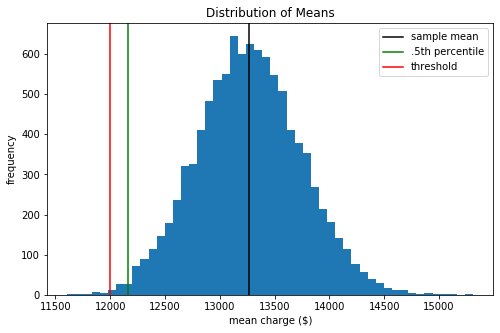

In [202]:
_=plt.figure(figsize=(8,5))
_=plt.hist(test_mean_lst, bins=50)
_=plt.axvline(test_mean,c='black')
_=plt.axvline(lower,c='green')
_=plt.axvline(12000,c='r')
_=plt.legend(['sample mean','.5th percentile','threshold'])
_=plt.title('Distribution of Means')
_=plt.xlabel('mean charge ($)')
_=plt.ylabel('frequency')

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

The null hypothesis is that the hospital charges the same amount to the two groups. The alternative hypothesis is that the hospital charges different amounts to both.

We are making the assumption that each individual variance comes from a sample of the population, and is not the variance of the entire population. Bessel's correction has been applied: the denominator in the square root is the sum of the size of the two populations, minus one for each group's correction. We can also assume that the variances are equal. 

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [203]:
#First we separate the insured from the uninsured, creating separate dataframes for each:
insured = medical[medical['insuranceclaim']==1]
uninsured = medical[medical['insuranceclaim']==0]
print('There are',len(insured),'insured cases and',len(uninsured),'uninsured cases.')


There are 783 insured cases and 555 uninsured cases.


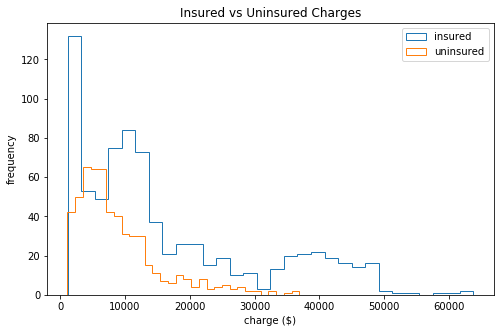

In [204]:
_=plt.figure(figsize=(8,5))
_=plt.title('Insured vs Uninsured Charges')
_=plt.hist(insured['charges'], histtype='step',bins=30)
_=plt.hist(uninsured['charges'],histtype='step', bins=30)
_=plt.legend(['insured','uninsured'])
_=plt.xlabel('charge ($)')
_=plt.ylabel('frequency')

In [205]:
#Now we can find the summary statistics for each group:
ins_mean = round(insured.charges.mean(),2)
unins_mean = round(uninsured.charges.mean(),2)
print('The mean charge for the insured is $',ins_mean,'and for uninsured is $',unins_mean)
print('This certainly doesn\'t look good at first glace. The ratio is',round(ins_mean/unins_mean,2),', almost double!')

The mean charge for the insured is $ 16423.93 and for uninsured is $ 8821.42
This certainly doesn't look good at first glace. The ratio is 1.86 , almost double!


In [206]:
#Finding the standard deviations and computing the t test statistic we find:
s0=round(insured.charges.std(),2)
n0=len(insured.charges)
s1=round(uninsured.charges.std(),2)
n1=len(uninsured.charges)

sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/(n0 + n1 - 2))

t_score = (ins_mean - unins_mean)/(sp*np.sqrt(1/n0 + 1/n1))

print('The pooled standard deviation is',round(sp,4),'and the t score is', round(t_score,4))
print('This is an extremely high t score, showing that there is a statistical difference between the two groups.')

The pooled standard deviation is 11520.0354 and the t score is 11.8933
This is an extremely high t score, showing that there is a statistical difference between the two groups.


In [207]:
#Computing the p-score:
p = round(1 - t.cdf(t_score,df=n0+n1-2),2)
print('The p-score is:',p,', again showing that we must reject the null hypothesis that insured and uninsured patients'\
      ' are charged the same.')

The p-score is: 0.0 , again showing that we must reject the null hypothesis that insured and uninsured patients are charged the same.


In [208]:
#Now using the built-in scipy.stats ttest_ind function:
t_test = ttest_ind(insured.charges,uninsured.charges)
t_score2 = round(t_test[0],4)
p2 = round(t_test[1],4)
print('t-score:',t_score2,'   p-score:',p2)

t-score: 11.8933    p-score: 0.0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [209]:
#Now using the built-in scipy.stats ttest_ind function:
t_test = ttest_ind(insured.charges,uninsured.charges, equal_var=False)
t_score2 = round(t_test[0],4)
p2 = round(t_test[1],4)
print('t-score:',t_score2,'   p-score:',p2)

t-score: 13.298    p-score: 0.0


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

The documentation for the scipy.stats statistical tests does not have a z-test function. It does, however, contain zmap and zscore functions in the Transformations section. So while the z functionality may not be categorized under statistical tests, scipy.stats still has a way of getting the z-scores. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test